# **Exploratory Data Analysis(EDA)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

In [6]:
import os
os.getcwd()

'c:\\Users\\All\\Documents\\Code\\Capstone-E-Commerce-Analysis\\jupyter_notebooks'

# Section 1

Section 1 content

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("../dataset/sales.csv")


In [27]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [10]:
df["Revenue"] = df["Price"] * df["Quantity"]
df['InvoiceDate_Year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_Month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_Day'] = df['InvoiceDate'].dt.day

Earlier Record

In [29]:
df.sort_values(by='InvoiceDate', inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
802647,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,9
802644,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011,12,9
802642,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011,12,9
802636,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680,France,23.40,2011,12,9


Latest Record

In [30]:
df.sort_values(by='InvoiceDate', inplace=True, ascending=False)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
802650,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85,2011,12,9
802643,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680,France,15.60,2011,12,9
802640,581587,22727,ALARM CLOCK BAKELIKE RED,4,2011-12-09 12:50:00,3.75,12680,France,15.00,2011,12,9
802637,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011,12,9
802638,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,19.80,2011,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60,2009,12,1
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,1
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.50,2009,12,1


In [11]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802651 entries, 0 to 802650
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Invoice            802651 non-null  int64         
 1   StockCode          802651 non-null  object        
 2   Description        802651 non-null  object        
 3   Quantity           802651 non-null  int64         
 4   InvoiceDate        802651 non-null  datetime64[ns]
 5   Price              802651 non-null  float64       
 6   Customer ID        802651 non-null  int64         
 7   Country            802651 non-null  object        
 8   Revenue            802651 non-null  float64       
 9   InvoiceDate_Year   802651 non-null  int32         
 10  InvoiceDate_Month  802651 non-null  int32         
 11  InvoiceDate_Day    802651 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(3)
memory usage: 64.3+ MB


In [13]:
df.describe()

,Invoice,Quantity,InvoiceDate,Price,Customer ID,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
count,802651.000000,802651.000000,802651,802651.000000,802651.000000,802651.000000,802651.000000,802651.000000,802651.000000
mean,537405.207846,13.318923,2011-01-02 09:19:35.502254592,2.930701,15338.152891,21.721103,2010.423090,7.508100,15.203513
min,489434.000000,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000,2009.000000,1.000000,1.000000
25%,514949.000000,2.000000,2010-07-07 11:53:00,1.250000,13988.000000,4.950000,2010.000000,5.000000,8.000000
50%,536987.000000,5.000000,2010-12-03 14:54:00,1.950000,15276.000000,11.800000,2010.000000,8.000000,15.000000
75%,561616.000000,12.000000,2011-07-28 13:02:00,3.750000,16809.000000,19.500000,2011.000000,11.000000,23.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000,168469.600000,2011.000000,12.000000,31.000000
std,26667.115808,143.867278,NaN,4.275886,1693.903916,222.568700,0.566177,3.446484,8.694774


### Key Findings

- The revenue distribution is highly skewed,  as inferred from comparing its standard deviation to its mean. This means that the values are extremely spread out.

- The quantity distribution is highly skewed too, for the same reason as above.

This tells me that I should further investigate the data to see which products are unusually priced in order to prepare for machine learning practices.

- The average month of which transactions are made tells us that September-October is when people are purchasing items.

This likely is due to the holidays coming up soon.


### Transactions per country

In [14]:
country_transactions = df.groupby('Country')['Invoice'].nunique()
country_transactions = country_transactions.sort_values(ascending=False)
country_percent = country_transactions / country_transactions.sum() * 100

country_percent

Country
United Kingdom          91.165218
Germany                  2.057714
France                   1.612286
EIRE                     1.442859
Netherlands              0.590261
Spain                    0.393507
Belgium                  0.390774
Sweden                   0.267803
Australia                0.243209
Portugal                 0.226813
Switzerland              0.224080
Italy                    0.161229
Finland                  0.147565
Channel Islands          0.147565
Denmark                  0.114773
Austria                  0.109308
Norway                   0.106575
Cyprus                   0.095644
Japan                    0.090179
Poland                   0.076515
Greece                   0.049188
USA                      0.043723
Unspecified              0.043723
United Arab Emirates     0.024594
Singapore                0.021862
Iceland                  0.021862
Malta                    0.019129
Israel                   0.019129
Canada                   0.019129
Lithua

This tells us that majority of the customers come from the United Kingdom, which makes sense as the company is based and registered in the same country.

This poses as a bias issue as most of the data would be influenced by purchasing behaviour in the UK and would not be indicative of international customers.

### Revenue per Country

In [15]:
country_revenue = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)
country_revenue_percent = country_revenue / country_revenue.sum() * 100
country_revenue_percent

Country
United Kingdom          83.868696
EIRE                     3.392915
Netherlands              3.154399
Germany                  2.230236
France                   1.808267
Australia                0.966388
Spain                    0.565620
Switzerland              0.537007
Sweden                   0.493729
Denmark                  0.393245
Belgium                  0.328790
Portugal                 0.275822
Japan                    0.270375
Channel Islands          0.254403
Norway                   0.242981
Italy                    0.168194
Finland                  0.144427
Cyprus                   0.141183
Austria                  0.116419
Greece                   0.107323
Singapore                0.075472
Poland                   0.060010
Israel                   0.059773
United Arab Emirates     0.051032
Unspecified              0.049406
USA                      0.045427
Lithuania                0.037591
Iceland                  0.032311
Malta                    0.027287
Canada

As expected, the United Kingdom generates the most revenue for the company as most of the transactions are within the United Kingdom.

Other that 4 countries(EIRE, Netherlands, Germany, France), each country generates less than 1% of the revenue towards the company.

In [16]:
country_revenue_no_uk = (df[df["Country"] != "United Kingdom"]
                         .groupby("Country")["Revenue"]
                         .sum()
                         .sort_values(ascending=False)
                         )

country_revenue_percent_no_uk = (
    country_revenue_no_uk / country_revenue_no_uk.sum() * 100
)

country_revenue_percent_no_uk

Country
EIRE                    21.033113
Netherlands             19.554522
Germany                 13.825517
France                  11.209676
Australia                5.990765
Spain                    3.506349
Switzerland              3.328976
Sweden                   3.060690
Denmark                  2.437777
Belgium                  2.038211
Portugal                 1.709854
Japan                    1.676087
Channel Islands          1.577075
Norway                   1.506272
Italy                    1.042657
Finland                  0.895322
Cyprus                   0.875209
Austria                  0.721695
Greece                   0.665309
Singapore                0.467861
Poland                   0.372011
Israel                   0.370540
United Arab Emirates     0.316355
Unspecified              0.306273
USA                      0.281610
Lithuania                0.233030
Iceland                  0.200302
Malta                    0.169155
Canada                   0.154035
Thaila

Exluding United Kingdom, we can see the percentage of transactions outside of the UK. 

### 

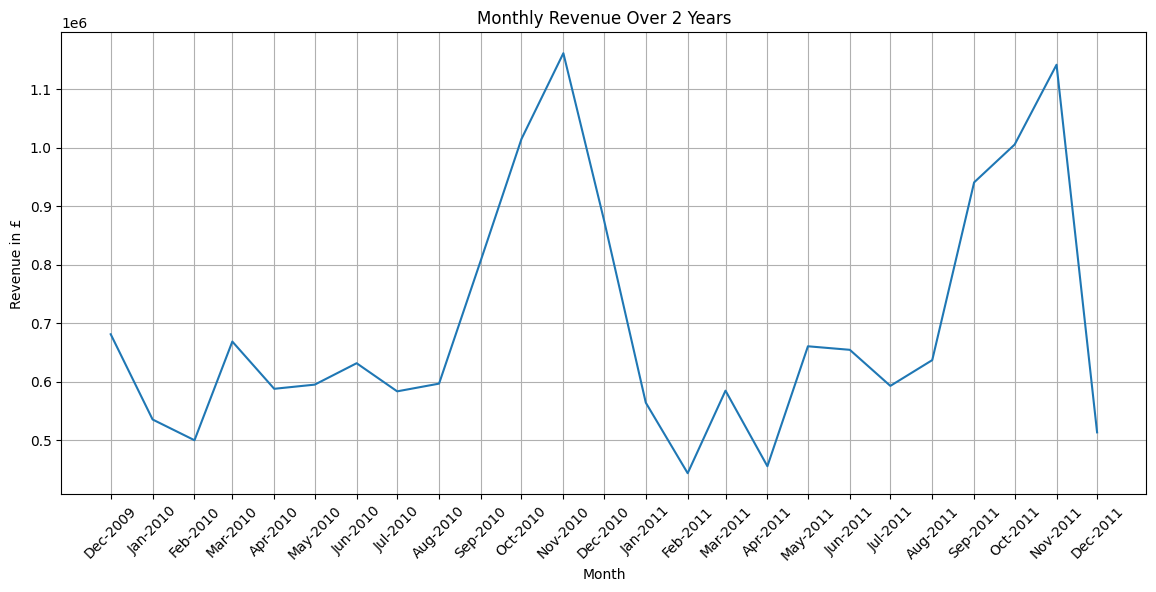

In [17]:
monthly_revenue = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()
month_labels = monthly_revenue.index.strftime('%b-%Y') 

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title('Monthly Revenue Over 2 Years')
plt.xlabel('Month')
plt.ylabel('Revenue in £')
plt.grid(True)

plt.xticks(ticks=monthly_revenue.index, labels=month_labels, rotation=45)

plt.show()

As stated earlier as the mean average for transactions would be around September-October. We can see the gradual increase in revenue over these months followed by a decline towards the end of December.

---

# Numerical Columns

Section 2 content

In [18]:
numeric_cols = [
    "Quantity",
    "Price",
    "Revenue",
    "InvoiceDate_Year",
    "InvoiceDate_Month",
    "InvoiceDate_Day"
]

numeric_columns = df[numeric_cols]

### Distribution of values

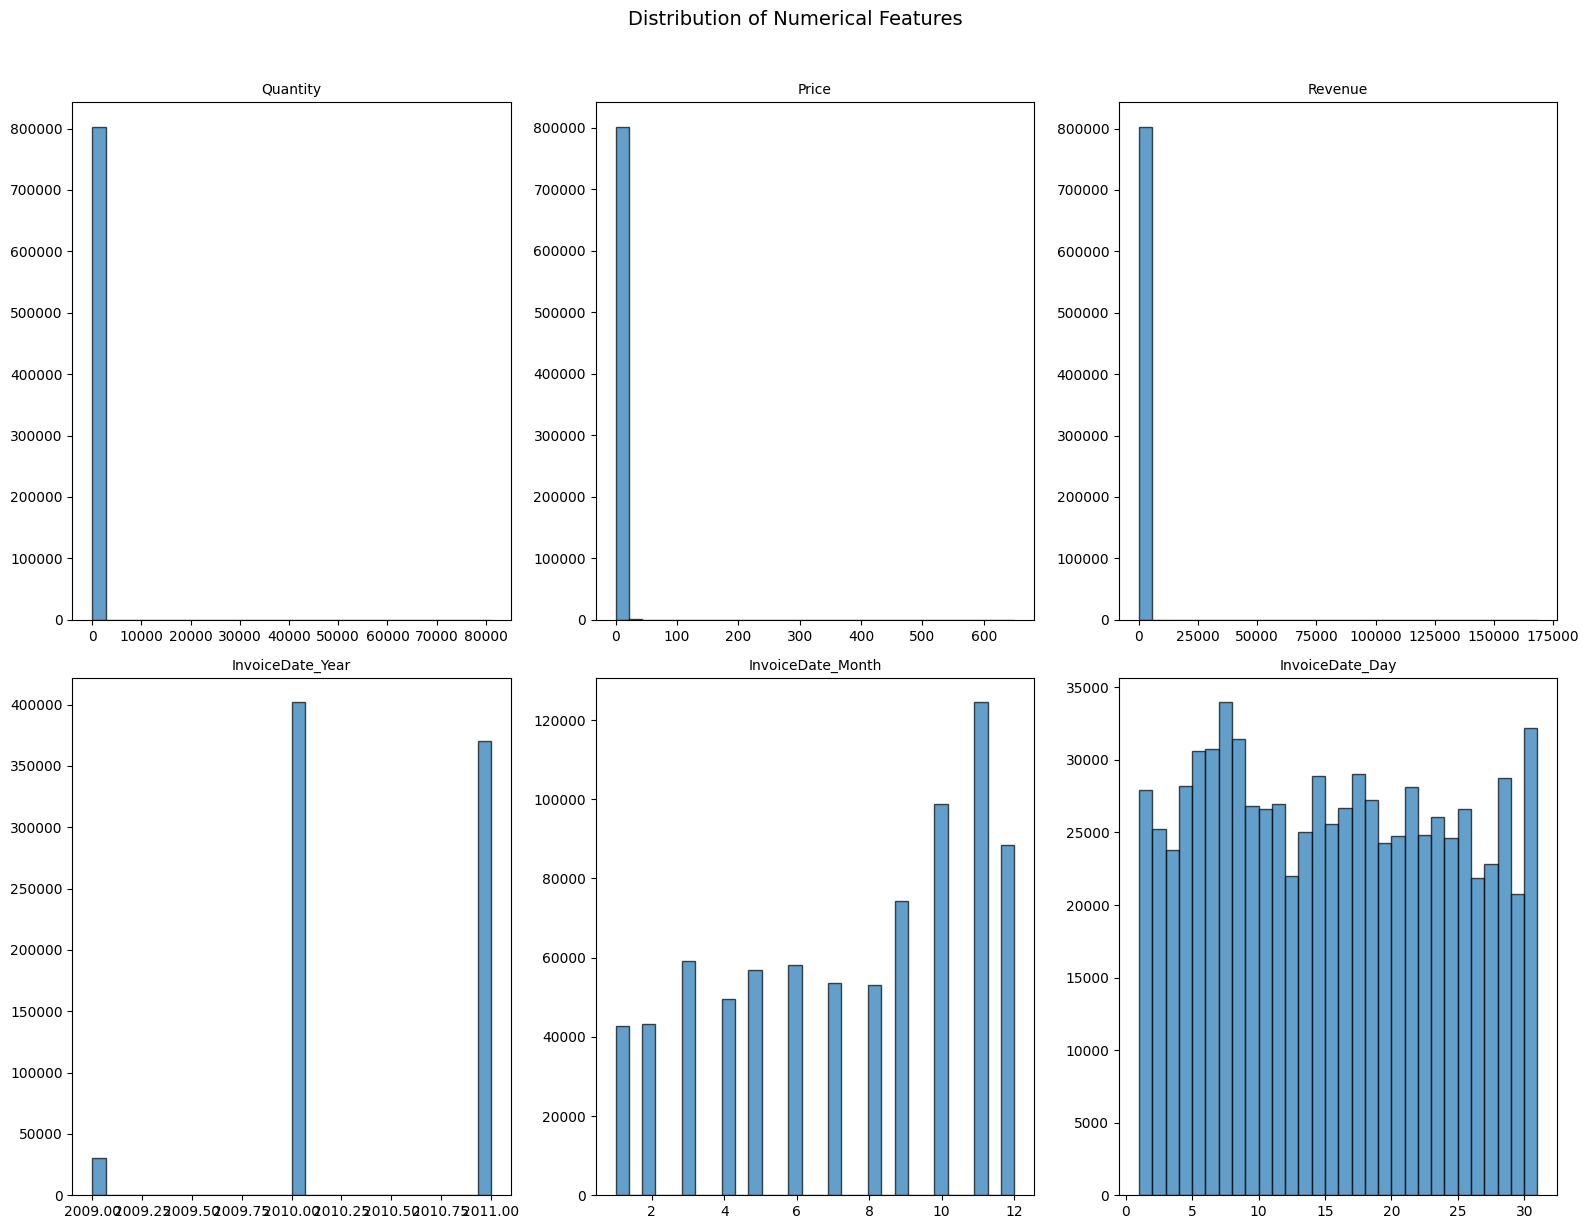

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numeric_columns.columns):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

The month of November has the most amount of transactions. This is likely due to the the Christmas season.

### Boxplot Distribution

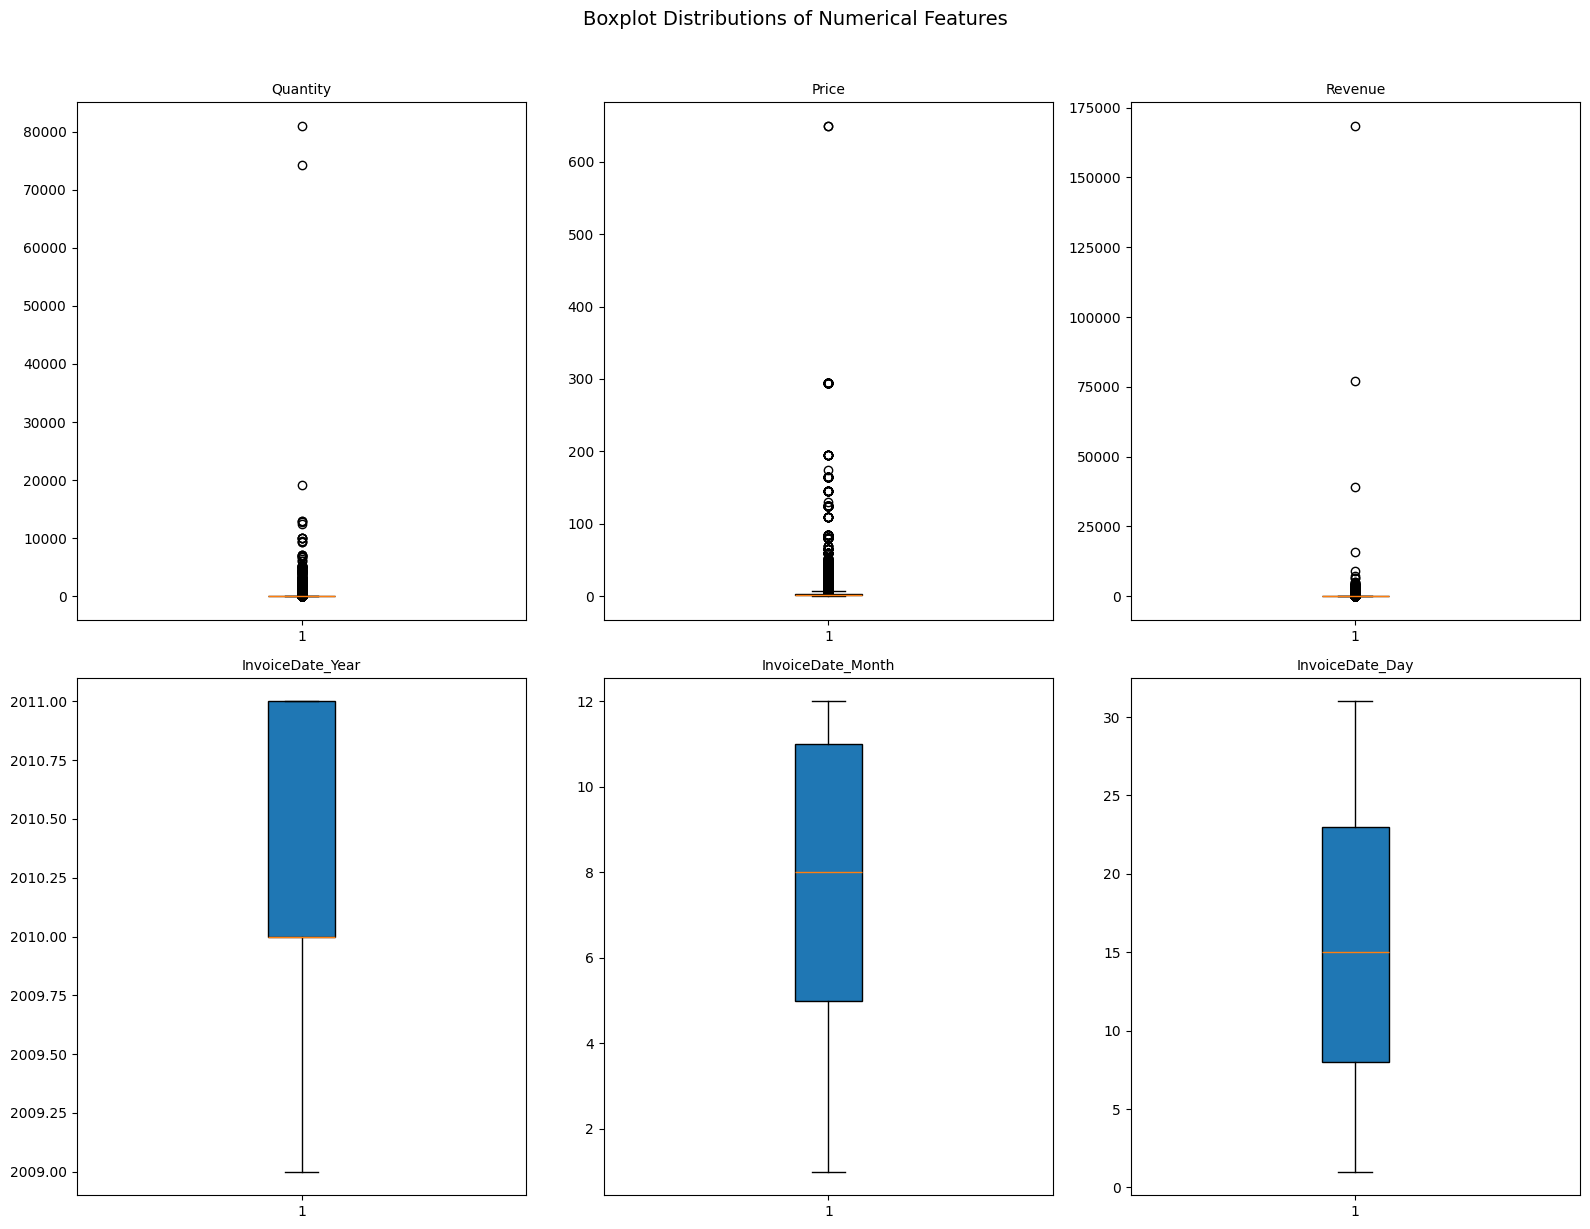

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numeric_columns.columns):
    axes[idx].boxplot(
        df[col].dropna(),
        vert=True,
        patch_artist=True
    )
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')

plt.suptitle('Boxplot Distributions of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Correlation Analysis

In [21]:
corr_matrix = numeric_columns.corr()
corr_matrix

,Quantity,Price,Revenue,InvoiceDate_Year,InvoiceDate_Month,InvoiceDate_Day
Quantity,1.000000,-0.028143,0.833749,-0.001185,-0.007124,-0.000941
Price,-0.028143,1.000000,0.061067,-0.016935,-0.016336,-0.001979
Revenue,0.833749,0.061067,1.000000,0.001346,-0.002828,-0.002408
InvoiceDate_Year,-0.001185,-0.016935,0.001346,1.000000,-0.136186,0.065224
InvoiceDate_Month,-0.007124,-0.016336,-0.002828,-0.136186,1.000000,-0.140119
InvoiceDate_Day,-0.000941,-0.001979,-0.002408,0.065224,-0.140119,1.000000


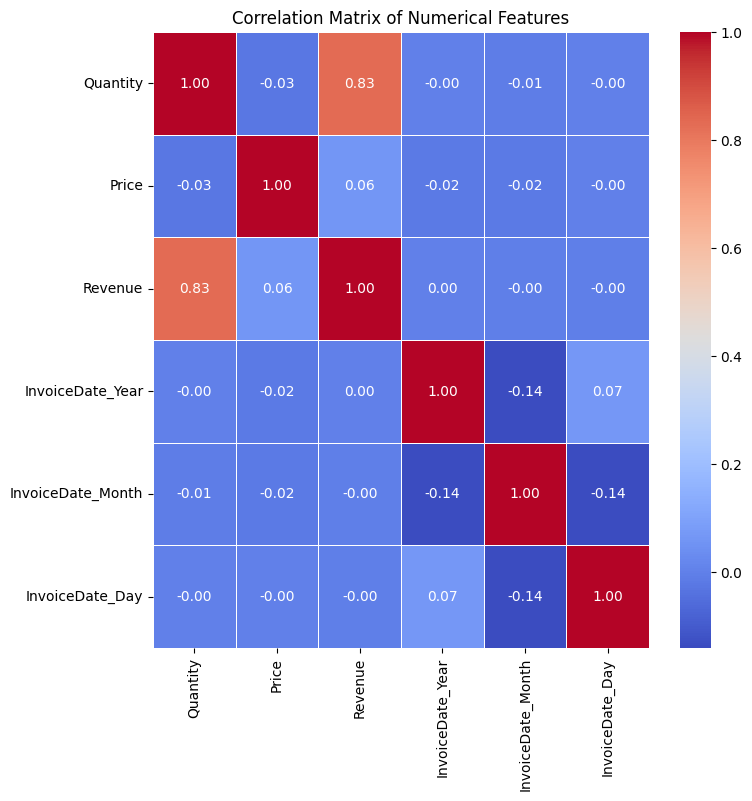

In [22]:
plt.figure(figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Findings
- Strong Positive correlation between Revenue and Quantity: Quantity of an item has more impact on the Revenue than the price of an item
- Weak Negative correlation between Revenue and Price: Higher priced items may result in lower Revenue per transaction
- No Correlation between Price and Quantity: Quantity of items purchased are not dictated by the price of the items.

---

# Categorical

In [ ]:
categoric_columns = df.select_dtypes(include=["object"]).columns.tolist()
categoric_columns

['StockCode', 'Description', 'Country']

---

# Investigation

### List countries by revenue in total

In [ ]:
df.groupby("Country")["Revenue"].sum().sort_values(ascending=False)

Country
United Kingdom          1.462206e+07
EIRE                    5.915367e+05
Netherlands             5.499527e+05
Germany                 3.888298e+05
France                  3.152617e+05
Australia               1.684847e+05
Spain                   9.861279e+04
Switzerland             9.362434e+04
Sweden                  8.607904e+04
Denmark                 6.856019e+04
Belgium                 5.732277e+04
Portugal                4.808804e+04
Japan                   4.713839e+04
Channel Islands         4.435376e+04
Norway                  4.236248e+04
Italy                   2.932375e+04
Finland                 2.518010e+04
Cyprus                  2.461444e+04
Austria                 2.029701e+04
Greece                  1.871119e+04
Singapore               1.315816e+04
Poland                  1.046245e+04
Israel                  1.042109e+04
United Arab Emirates    8.897190e+03
Unspecified             8.613650e+03
USA                     7.920010e+03
Lithuania               6.5537

### Revenue by Year, Month, Country

In [ ]:
df.groupby(["InvoiceDate_Year", "InvoiceDate_Month", "Country"])["Revenue"].sum()

InvoiceDate_Year  InvoiceDate_Month  Country        
2009              12                 Australia             271.10
                                     Austria              1918.34
                                     Belgium               287.60
                                     Channel Islands       989.18
                                     Cyprus               3556.98
                                                          ...    
2011              12                 Portugal             2416.19
                                     Spain                 288.21
                                     Sweden                238.00
                                     USA                   885.24
                                     United Kingdom     470331.81
Name: Revenue, Length: 541, dtype: float64

### Sorting most purchased products by quantity

In [ ]:
df.groupby("StockCode")["Quantity"].sum().sort_values(ascending=False)

StockCode
84077     109169
85099B     94983
85123A     93697
21212      91263
23843      80995
           ...  
46138D         1
20620          1
35945          1
85171          1
84845A         1
Name: Quantity, Length: 4621, dtype: int64

---

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---